In [1]:
import pandas as pd
import os


In [2]:
files = [file for file in os.listdir('/content/drive/MyDrive/Sales_Data')]

In [3]:
for file in files:
  print(file)


Sales_March_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_July_2019.csv
Sales_September_2019.csv
Sales_August_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_April_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv


In [4]:
df = pd.DataFrame()

for file in files:
  data = pd.read_csv('/content/drive/MyDrive/Sales_Data/'+file)
  df = pd.concat([df,data])

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [6]:
df.to_csv('df.csv', index=False)

In [7]:
df1 = pd.read_csv('df.csv')

In [8]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
df1.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
rows_with_nan = df1[df1.isna().any(axis=1)]

print(rows_with_nan)

       Order ID Product Quantity Ordered Price Each Order Date  \
1047        NaN     NaN              NaN        NaN        NaN   
1542        NaN     NaN              NaN        NaN        NaN   
1653        NaN     NaN              NaN        NaN        NaN   
2014        NaN     NaN              NaN        NaN        NaN   
2043        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
184678      NaN     NaN              NaN        NaN        NaN   
184695      NaN     NaN              NaN        NaN        NaN   
185042      NaN     NaN              NaN        NaN        NaN   
185729      NaN     NaN              NaN        NaN        NaN   
186463      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
1047                NaN  
1542                NaN  
1653                NaN  
2014                NaN  
2043                NaN  
...                 ...  
184678              NaN  

In [12]:
df1.shape

(186850, 6)

In [13]:
df1.dropna(how='all', inplace= True)

In [14]:
df1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# **Sales trend according to the Month**

In [15]:
df1 = df1[df1['Order Date'].str[0:2]!='Or']

In [16]:
df1['Month']=df1['Order Date'].str[0:2]
df1['Month']=df1['Month'].astype('Int32')

In [17]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


In [18]:
df1['Order Date'].value_counts()

Order Date
12/15/19 20:16    8
04/02/19 13:24    7
10/30/19 21:28    7
12/11/19 13:24    7
10/11/19 19:44    6
                 ..
07/20/19 05:03    1
07/01/19 18:17    1
07/02/19 22:43    1
07/08/19 22:27    1
07/03/19 07:44    1
Name: count, Length: 142395, dtype: int64

In [19]:
df1[df1['Order Date'].str[0:2]=='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [21]:
df1 = df1[df1['Order Date'].str[0:2]!='Or']

In [22]:
df1['Quantity Ordered']=pd.to_numeric(df1['Quantity Ordered'])
df1['Price Each']=pd.to_numeric(df1['Price Each'])

In [23]:
df1['Sales'] = df1['Quantity Ordered']* df1['Price Each']

In [24]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [25]:
results=df1.groupby('Month').sum()['Sales']


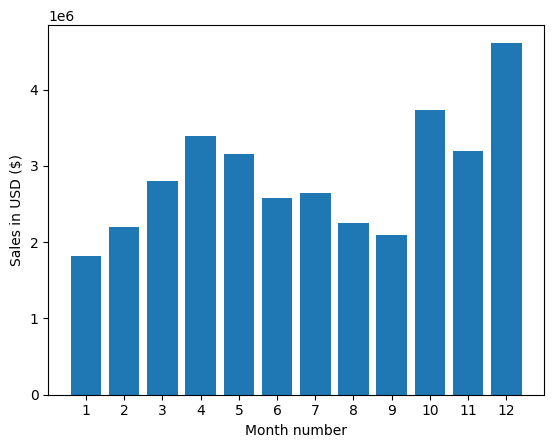

In [26]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [27]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


# **Sales trend in each city**

In [28]:
df1['City'] = df1['Purchase Address'].apply(lambda x: x.split(",")[1])

In [29]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas


In [30]:
x = '273 Wilson St, Seattle, WA 98101'

In [31]:
x.split(',')

['273 Wilson St', ' Seattle', ' WA 98101']

In [32]:
x.split(',')[2].split(' ')[1]

df1['City'].value_counts()

results1=df1.groupby('City').sum()['Sales']

In [33]:
results1

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

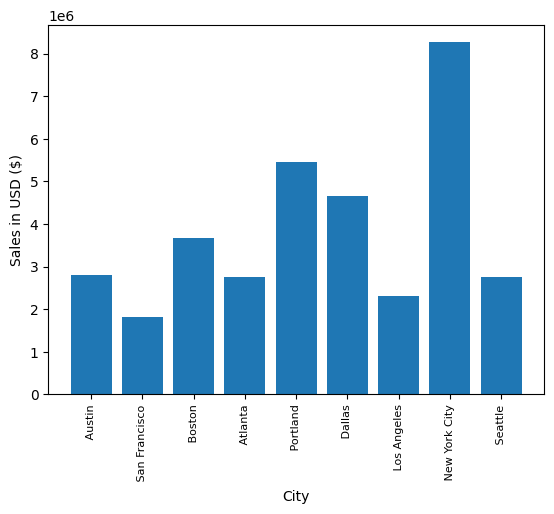

In [34]:
plt.bar(df1['City'].unique() , results1)
plt.xticks(df1['City'].unique(), rotation='vertical', size=8)

plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

In [35]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco


# **Which time should we advertise**

In [36]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

<ipython-input-36-05cdc06458ac>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Order Date'] = pd.to_datetime(df1['Order Date'])


In [37]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco


In [38]:
df1['Hour'] = df1['Order Date'].dt.hour
df1['Minute'] = df1['Order Date'].dt.minute

In [39]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0,1
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,20,58
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12,1
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,6,43
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas,10,39


In [40]:
hours = [hours for hours, df2 in df1.groupby('Hour')]

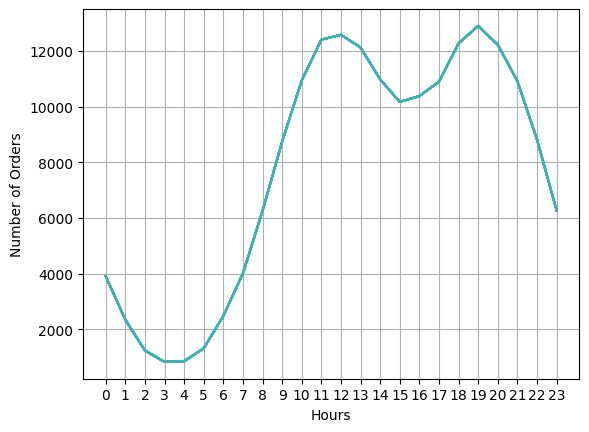

In [41]:
plt.plot(hours, df1.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

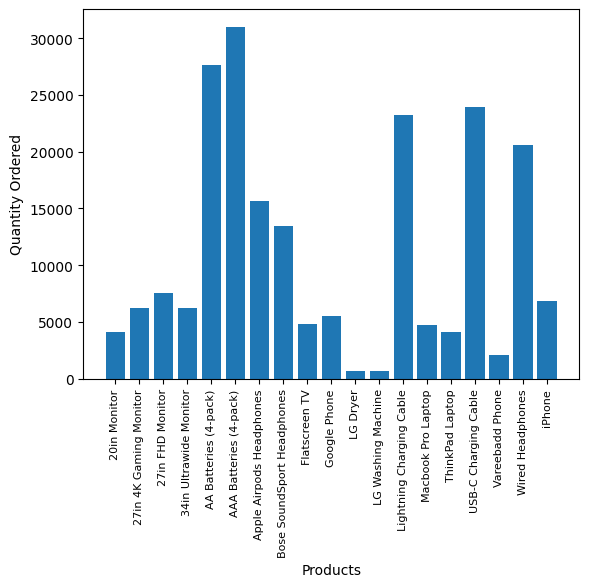

In [57]:

product_group = df1.groupby('Product').agg({'Quantity Ordered': 'sum'})


products = product_group.index.tolist()
quantity_ordered = product_group['Quantity Ordered'].tolist()


plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.bar(products, quantity_ordered)
plt.xticks(rotation='vertical', size=8)
plt.show()

In [59]:
df1['Price Each'] = pd.to_numeric(df1['Price Each'], errors='coerce')

In [63]:
prices = df1.groupby('Product')['Price Each'].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

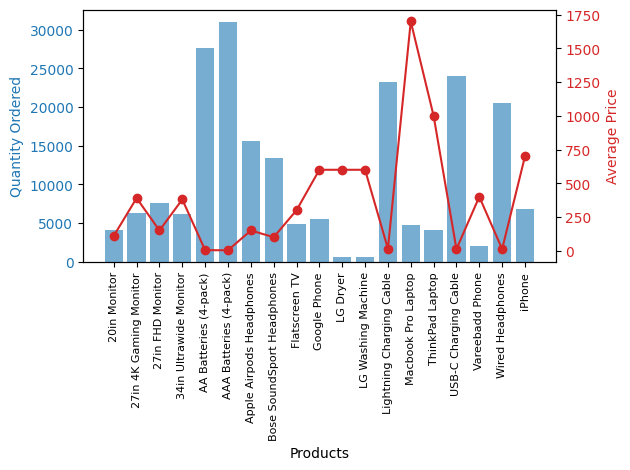

In [65]:
product_group = df1.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

# Extract product names, total quantities ordered, and average prices
products = product_group.index.tolist()
quantity_ordered = product_group['Quantity Ordered'].tolist()
average_prices = product_group['Price Each'].tolist()

# Plotting the data
fig, ax1 = plt.subplots()

# Plot quantity ordered on the left y-axis
ax1.set_xlabel('Products')
plt.xticks(rotation='vertical', size=8)
ax1.set_ylabel('Quantity Ordered', color='tab:blue')
ax1.bar(products, quantity_ordered, color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot average prices
ax2 = ax1.twinx()
ax2.set_ylabel('Average Price', color='tab:red')
ax2.plot(products, average_prices, color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Show the plot
fig.tight_layout()
plt.xticks(rotation='vertical', size=8)
plt.show()

In [66]:
product_group

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00
